# Processamento dos dados baixados do REDEONDAS
AtmosMarine

Dificuldades: em florianopolis a coluna de hora esta zerada. problemas para montar o vetor de data

In [219]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
from datetime import datetime
%matplotlib inline

In [247]:
pathname = os.environ['HOME'] + 
        '/Dropbox/database/historic/buoys/redeondas/'

#list buoys
list_buoys = list(np.sort(os.listdir(pathname)))
list_buoys

['florianopolis',
 'lagoa_patos',
 'pontal_parana',
 'praia_cassino_2005',
 'praia_cassino_2016',
 'praia_forte',
 'recife',
 'rio_janeiro_1',
 'rio_janeiro_2',
 'tramandai_2007',
 'tramandai_2014']

In [248]:
#create variable with all data buoys
dd = {
      list_buoys[0]: pd.DataFrame(),
      list_buoys[1]: pd.DataFrame(),
      list_buoys[2]: pd.DataFrame(),
      list_buoys[3]: pd.DataFrame(),
      list_buoys[4]: pd.DataFrame(),
      list_buoys[5]: pd.DataFrame(),
      list_buoys[6]: pd.DataFrame(),
      list_buoys[7]: pd.DataFrame(),
      list_buoys[8]: pd.DataFrame(),
      list_buoys[9]: pd.DataFrame(),
      list_buoys[10]: pd.DataFrame()    
      }

for buoy in list_buoys:
    list_files = np.sort(os.listdir(pathname + buoy))

    for arq in list_files:
        tmp = pd.read_table(pathname + buoy + '/' + arq, delimiter='\s+',
                           header=None, names=['year','month','day','hour','a','b','hs','tp','dp'])

        dd[buoy] = pd.concat([dd[buoy], tmp], ignore_index=True)

        #date vector
        dd[buoy]['date'] = [datetime(int(dd[buoy].year[i]), int(dd[buoy].month[i]), int(dd[buoy].day[i]),
                               int(dd[buoy].hour[i])) for i in range(len(dd[buoy]))]

        #set date as index
        dd[buoy] = dd[buoy].set_index(dd[buoy].date)

In [255]:
def hstpdp(buoy_name):
    fig = pl.figure(figsize=(14,8))
    ax1 = fig.add_subplot(311)
    ax1.set_title(buoy_name)
    ax1.plot(dd[buoy_name].index, dd[buoy_name].hs,'.')
    ax1.grid('on')
    ax2 = fig.add_subplot(312)
    ax2.plot(dd[buoy_name].index, dd[buoy_name].tp,'.')
    ax2.grid('on')
    ax3 = fig.add_subplot(313)
    ax3.plot(dd[buoy_name].index, dd[buoy_name].dp,'.')
    ax3.grid('on')

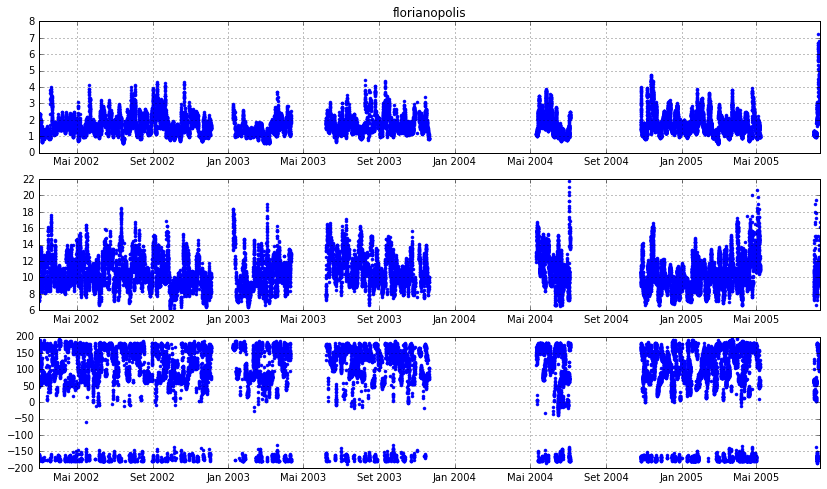

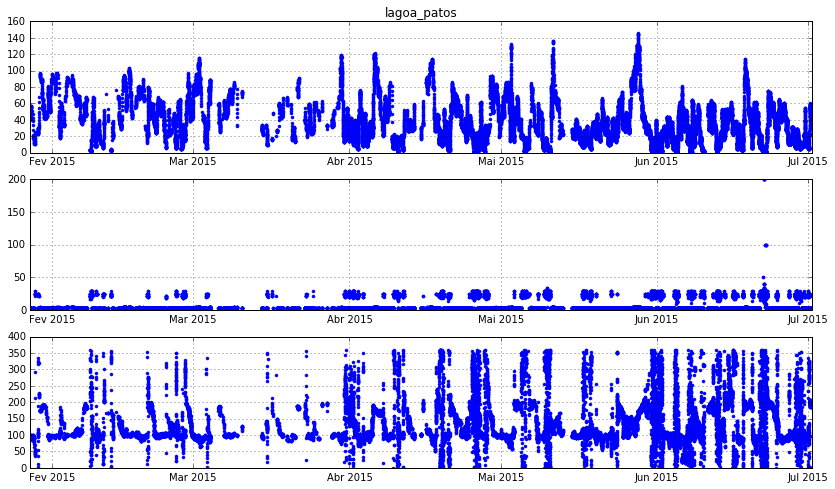

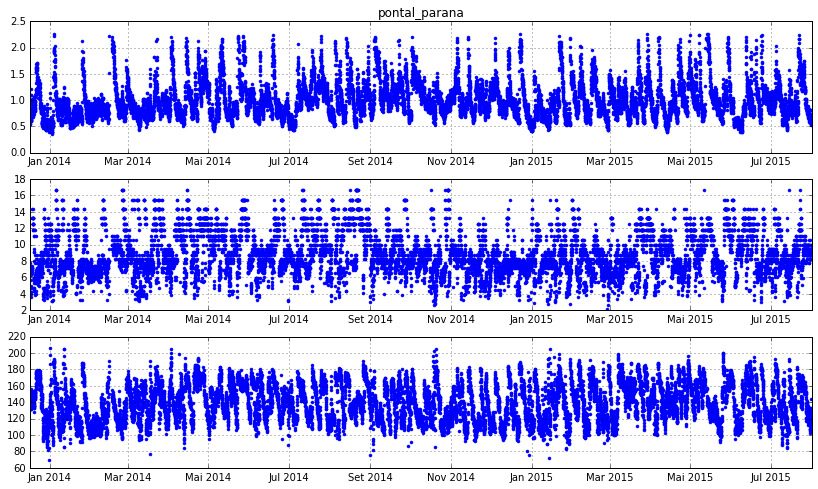

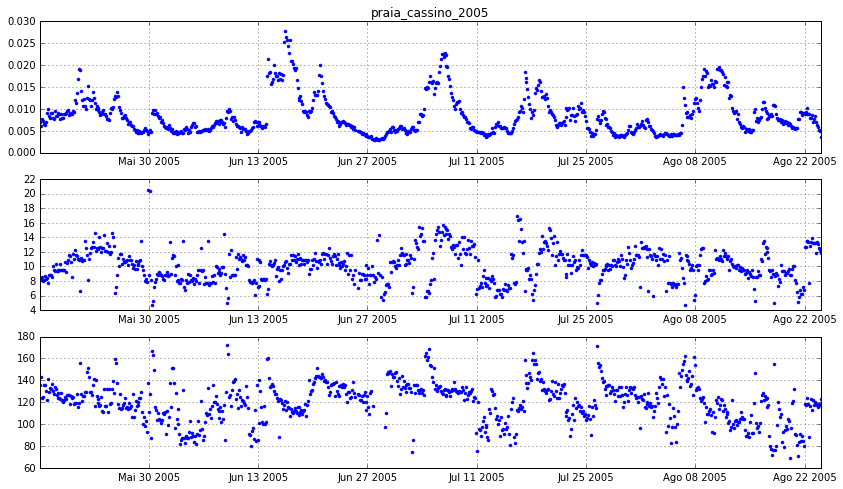

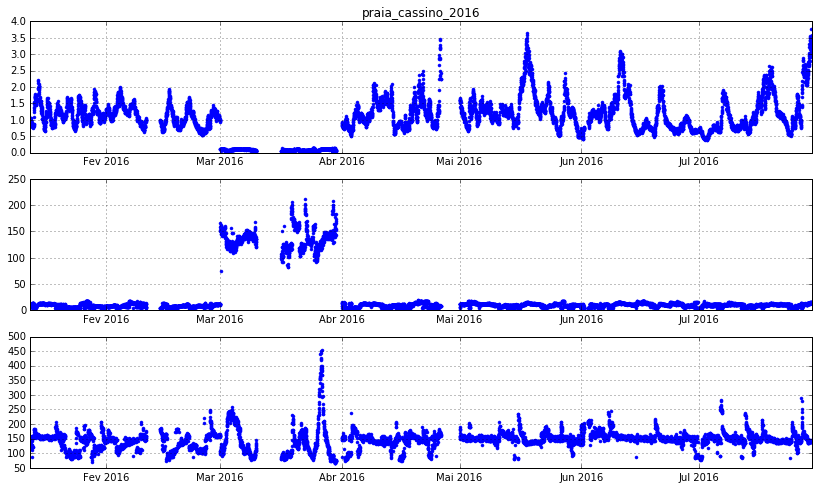

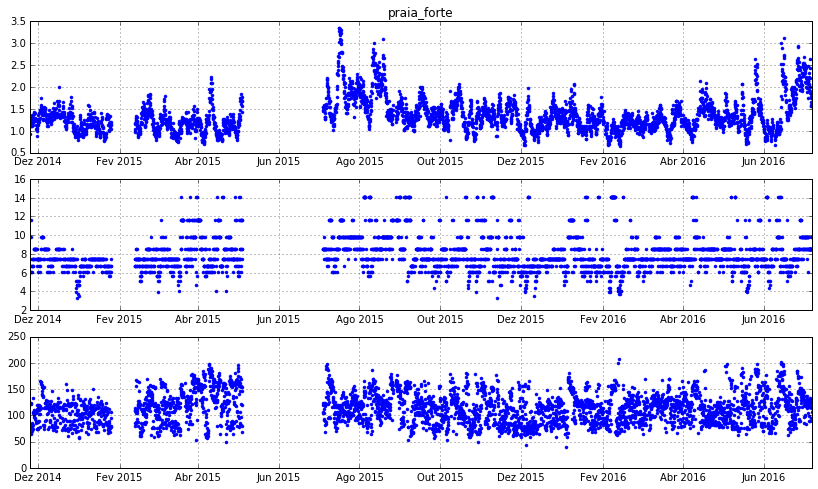

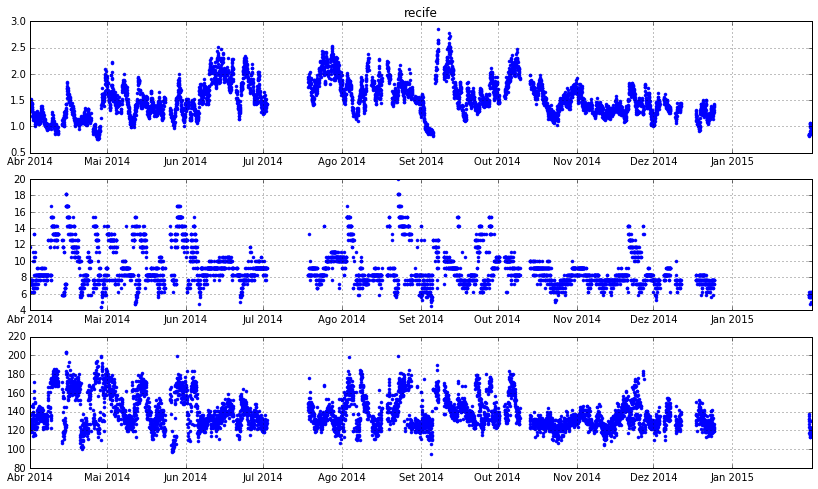

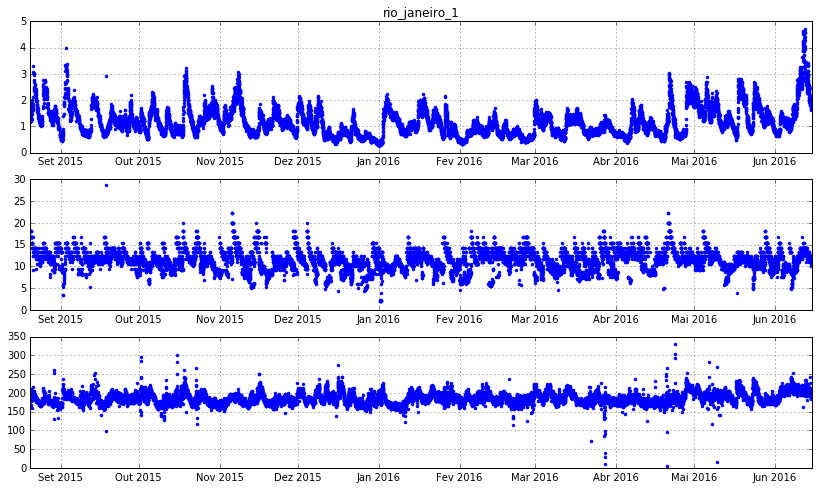

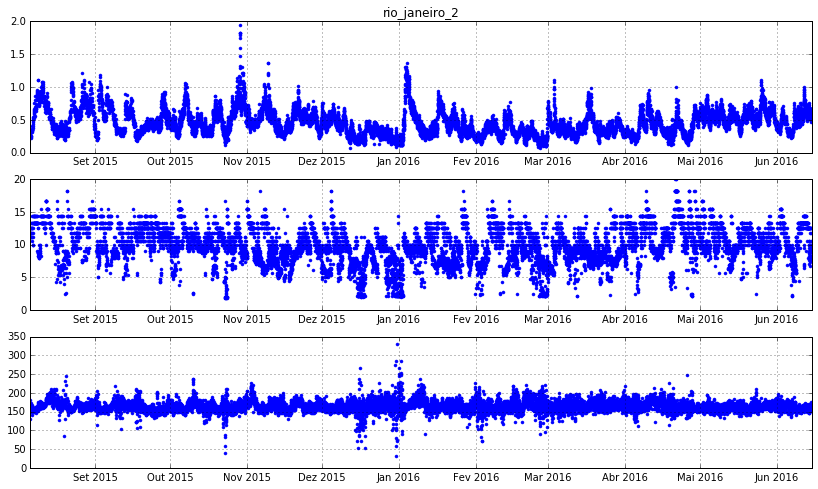

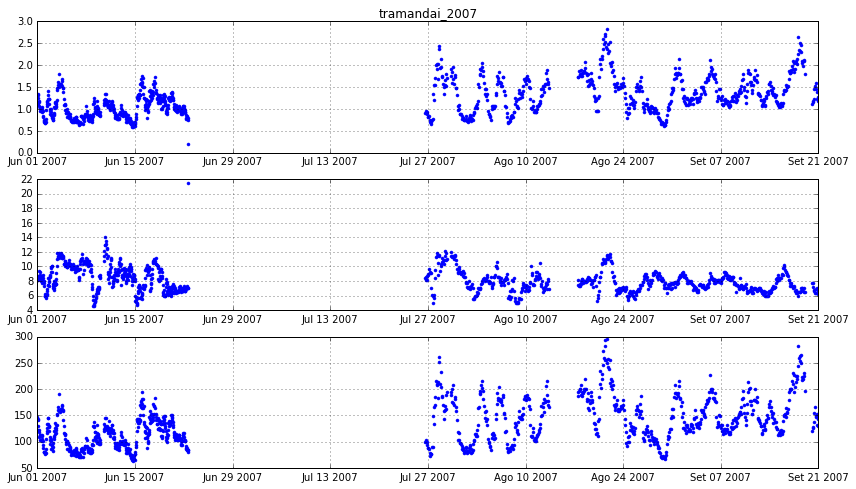

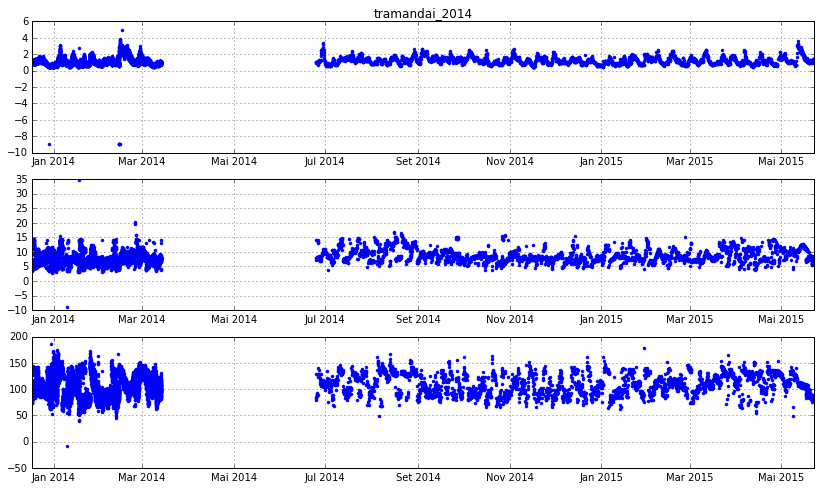

In [256]:
#plot figures

for buoy in list_buoys:
    hstpdp(buoy)